In [1]:
from google.colab import drive  ## Mount Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [158]:
import os
os.chdir('/content/drive/MyDrive/Urban/Urban_Shared_Analysis')

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
import pandas as pd
df = pd.read_csv('cases_by_county.csv')
df.head()

,Unnamed: 0,date,rolling_average_cases_per_100k_centered,state,name,fipscode
0,1,2020-02-08,0.0,AL,"Lee County, AL",1081
1,2,2020-02-11,0.0,AL,"Lee County, AL",1081
2,3,2020-02-14,0.0,AL,"Lee County, AL",1081
3,4,2020-02-18,0.0,AL,"Lee County, AL",1081
4,5,2020-02-20,0.0,AL,"Lee County, AL",1081


In [161]:
df1 = pd.read_csv('wastewater_by_county.csv')
df1.head()

,Unnamed: 0,sampling_week,effective_concentration_rolling_average,region,state,name,fipscode
0,0,2020-01-01,134.841964,Midwest,IL,"Peoria County, IL",17143
1,1,2020-01-15,0.000000,Northeast,MA,"Suffolk County, MA",25025
2,2,2020-01-22,0.000000,Northeast,MA,"Suffolk County, MA",25025
3,3,2020-01-29,0.000000,Northeast,MA,"Suffolk County, MA",25025
4,4,2020-02-05,0.000000,Northeast,MA,"Suffolk County, MA",25025


In [162]:
df1 = df1.rename(columns={"sampling_week": "date"})

In [163]:
merged = pd.merge(df1,df, on=['date','fipscode'])

In [164]:
merged.head()

,Unnamed: 0_x,date,effective_concentration_rolling_average,region,state_x,name_x,fipscode,Unnamed: 0_y,rolling_average_cases_per_100k_centered,state_y,name_y
0,3,2020-01-29,0.0,Northeast,MA,"Suffolk County, MA",25025,105741,0.01777,MA,"Suffolk County, MA"
1,4,2020-02-05,0.0,Northeast,MA,"Suffolk County, MA",25025,30149,0.00000,MA,"Suffolk County, MA"
2,5,2020-02-12,0.0,Northeast,MA,"Suffolk County, MA",25025,23025,0.00000,MA,"Suffolk County, MA"
3,6,2020-02-19,0.0,West,CA,"San Luis Obispo County, CA",6079,37581,0.00000,CA,"San Luis Obispo County, CA"
4,7,2020-02-19,0.0,Northeast,MA,"Suffolk County, MA",25025,80294,0.00000,MA,"Suffolk County, MA"


In [165]:
import pandas as pd
df2 = pd.read_csv('hospitals_with_waste.csv')
df2.head()

,Unnamed: 0,HRR,Total Hospital Beds,Total ICU Beds,Available Hospital Beds,Potentially Available Hospital Beds,Available ICU Beds,Potentially Available ICU Beds,Adult Population,Population 65+,Fipscode,Week,Concentration
0,1,"Akron, OH","1,358",186,518,938,94,140,"547,990","111,042",39153,2021-06-23,9.312740
1,1,"Akron, OH","1,358",186,518,938,94,140,"547,990","111,042",39153,2021-06-30,5.166726
2,1,"Akron, OH","1,358",186,518,938,94,140,"547,990","111,042",39153,2021-07-07,16.996787
3,1,"Akron, OH","1,358",186,518,938,94,140,"547,990","111,042",39153,2021-07-14,19.588565
4,1,"Akron, OH","1,358",186,518,938,94,140,"547,990","111,042",39153,2021-07-21,8.308920


In [166]:
df2 = df2.rename(columns={"Week": "date"})

In [167]:
df2 = df2.rename(columns={"Fipscode": "fipscode"})

In [168]:
merged_final = pd.merge(merged,df2, on=['date','fipscode'])

In [169]:
merged_final.head()

,Unnamed: 0_x,date,effective_concentration_rolling_average,region,state_x,name_x,fipscode,Unnamed: 0_y,rolling_average_cases_per_100k_centered,state_y,...,HRR,Total Hospital Beds,Total ICU Beds,Available Hospital Beds,Potentially Available Hospital Beds,Available ICU Beds,Potentially Available ICU Beds,Adult Population,Population 65+,Concentration
0,3,2020-01-29,0.0,Northeast,MA,"Suffolk County, MA",25025,105741,0.01777,MA,...,"Boston, MA","10,239","1,157","2,548","6,393",438,798,"4,022,208","782,014",0.0
1,4,2020-02-05,0.0,Northeast,MA,"Suffolk County, MA",25025,30149,0.00000,MA,...,"Boston, MA","10,239","1,157","2,548","6,393",438,798,"4,022,208","782,014",0.0
2,5,2020-02-12,0.0,Northeast,MA,"Suffolk County, MA",25025,23025,0.00000,MA,...,"Boston, MA","10,239","1,157","2,548","6,393",438,798,"4,022,208","782,014",0.0
3,6,2020-02-19,0.0,West,CA,"San Luis Obispo County, CA",6079,37581,0.00000,CA,...,"San Luis Obispo, CA",390,54,202,296,33,44,"213,703","46,965",0.0
4,7,2020-02-19,0.0,Northeast,MA,"Suffolk County, MA",25025,80294,0.00000,MA,...,"Boston, MA","10,239","1,157","2,548","6,393",438,798,"4,022,208","782,014",0.0


In [170]:
merged_final.head().T

,0,1,2,3,4
Unnamed: 0_x,3,4,5,6,7
date,2020-01-29,2020-02-05,2020-02-12,2020-02-19,2020-02-19
effective_concentration_rolling_average,0.0,0.0,0.0,0.0,0.0
region,Northeast,Northeast,Northeast,West,Northeast
state_x,MA,MA,MA,CA,MA
name_x,"Suffolk County, MA","Suffolk County, MA","Suffolk County, MA","San Luis Obispo County, CA","Suffolk County, MA"
fipscode,25025,25025,25025,6079,25025
Unnamed: 0_y,105741,30149,23025,37581,80294
rolling_average_cases_per_100k_centered,0.01777,0.0,0.0,0.0,0.0
state_y,MA,MA,MA,CA,MA


In [171]:
merged_final.drop(['Unnamed: 0_x','date', 'Unnamed: 0_y', 'state_y', 'name_y', 'Unnamed: 0', 'HRR', 'Total Hospital Beds', 'Available Hospital Beds', 'Total ICU Beds','Concentration','Potentially Available Hospital Beds','Potentially Available ICU Beds'  ],inplace=True, axis=1)

In [172]:
merged_final.head().T

,0,1,2,3,4
effective_concentration_rolling_average,0.0,0.0,0.0,0.0,0.0
region,Northeast,Northeast,Northeast,West,Northeast
state_x,MA,MA,MA,CA,MA
name_x,"Suffolk County, MA","Suffolk County, MA","Suffolk County, MA","San Luis Obispo County, CA","Suffolk County, MA"
fipscode,25025,25025,25025,6079,25025
rolling_average_cases_per_100k_centered,0.01777,0.0,0.0,0.0,0.0
Available ICU Beds,438,438,438,33,438
Adult Population,"4,022,208","4,022,208","4,022,208","213,703","4,022,208"
Population 65+,"782,014","782,014","782,014","46,965","782,014"


In [173]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
merged_final["region"] = le.fit_transform(merged_final.region)
merged_final["name_x"] = le.fit_transform(merged_final.name_x)
merged_final["state_x"] = le.fit_transform(merged_final.state_x)

In [174]:
merged_final.head()

,effective_concentration_rolling_average,region,state_x,name_x,fipscode,rolling_average_cases_per_100k_centered,Available ICU Beds,Adult Population,Population 65+
0,0.0,1,16,77,25025,0.01777,438,"4,022,208","782,014"
1,0.0,1,16,77,25025,0.00000,438,"4,022,208","782,014"
2,0.0,1,16,77,25025,0.00000,438,"4,022,208","782,014"
3,0.0,3,3,69,6079,0.00000,33,"213,703","46,965"
4,0.0,1,16,77,25025,0.00000,438,"4,022,208","782,014"


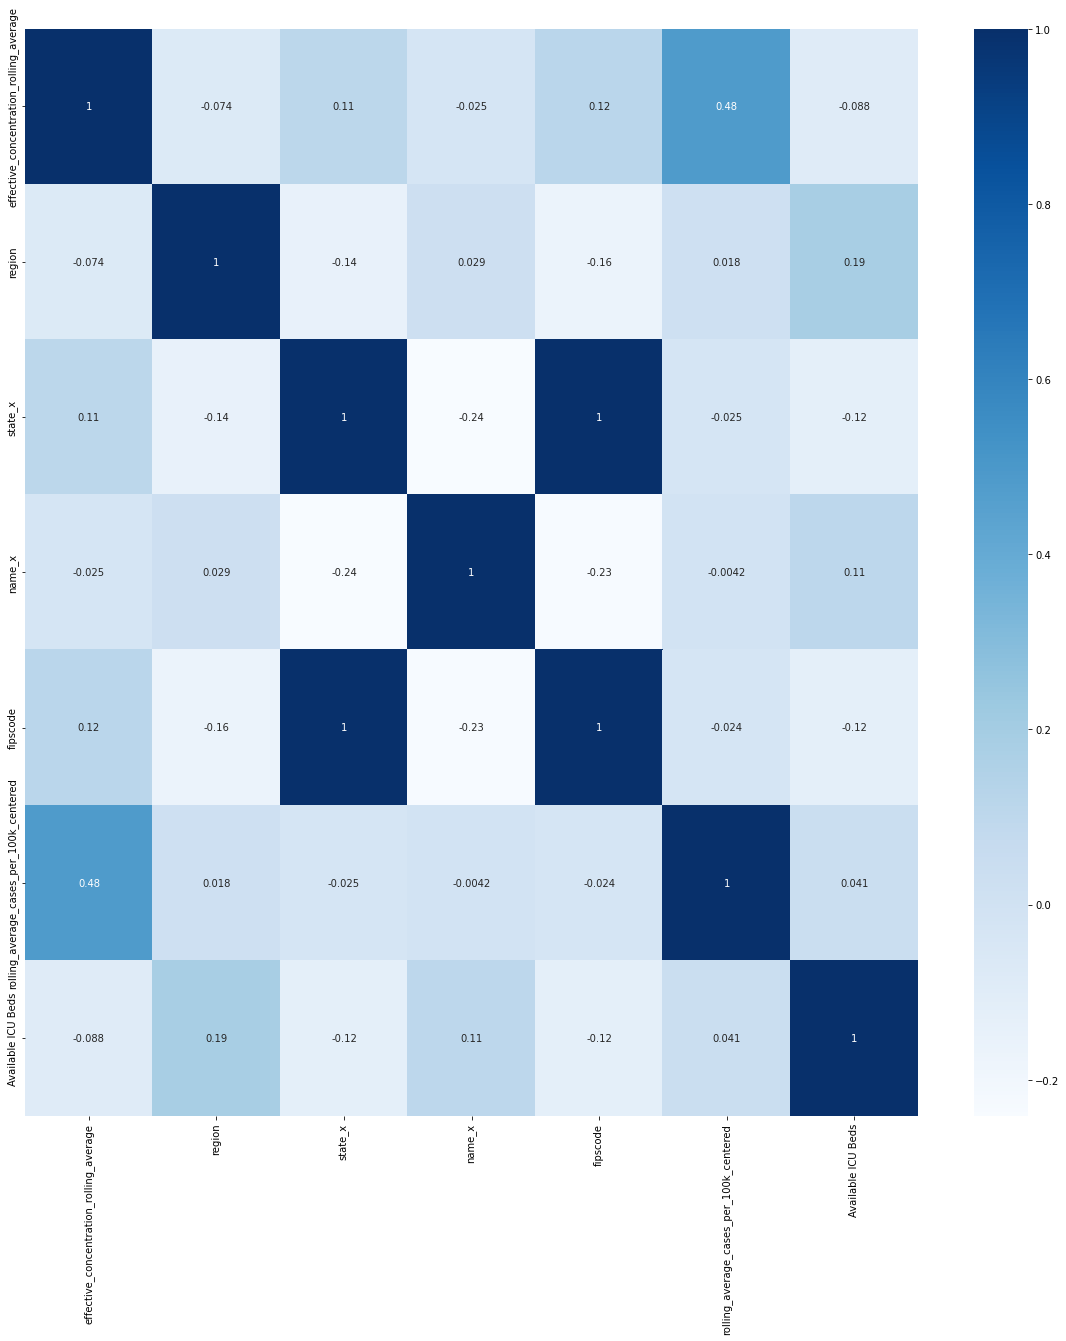

In [176]:
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
corr = merged_final.corr()
figure(figsize=(20, 20))
sns.heatmap(corr, cmap="Blues", annot=True)

In [177]:

#merged_final['Potentially Available Hospital Beds'] = merged_final['Potentially Available Hospital Beds'].astype(str).str.replace(',', '').astype(float)
merged_final['Available ICU Beds'] = merged_final['Available ICU Beds'].astype(str).str.replace(',', '').astype(float)
#merged_final['Potentially Available ICU Beds'] = merged_final['Potentially Available ICU Beds'].astype(str).str.replace(',', '').astype(float)


In [178]:
merged_final['Population 65+'] = merged_final['Population 65+'].astype(str).str.replace(',', '').astype(float)
merged_final['Adult Population'] = merged_final['Adult Population'].astype(str).str.replace(',', '').astype(float)


In [179]:
merged_final.head()

,effective_concentration_rolling_average,region,state_x,name_x,fipscode,rolling_average_cases_per_100k_centered,Available ICU Beds,Adult Population,Population 65+
0,0.0,1,16,77,25025,0.01777,438.0,4022208.0,782014.0
1,0.0,1,16,77,25025,0.00000,438.0,4022208.0,782014.0
2,0.0,1,16,77,25025,0.00000,438.0,4022208.0,782014.0
3,0.0,3,3,69,6079,0.00000,33.0,213703.0,46965.0
4,0.0,1,16,77,25025,0.00000,438.0,4022208.0,782014.0


In [180]:
merged_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4617 entries, 0 to 4616
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   effective_concentration_rolling_average  4617 non-null   float64
 1   region                                   4617 non-null   int64  
 2   state_x                                  4617 non-null   int64  
 3   name_x                                   4617 non-null   int64  
 4   fipscode                                 4617 non-null   int64  
 5   rolling_average_cases_per_100k_centered  4617 non-null   float64
 6   Available ICU Beds                       4617 non-null   float64
 7   Adult Population                         4617 non-null   float64
 8   Population 65+                           4617 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 360.7 KB


In [181]:
merged_final.corr()

,effective_concentration_rolling_average,region,state_x,name_x,fipscode,rolling_average_cases_per_100k_centered,Available ICU Beds,Adult Population,Population 65+
effective_concentration_rolling_average,1.000000,-0.074144,0.112270,-0.024538,0.116018,0.481890,-0.088319,-0.080429,-0.071219
region,-0.074144,1.000000,-0.144250,0.028936,-0.164448,0.017621,0.187954,0.204685,0.185389
state_x,0.112270,-0.144250,1.000000,-0.241212,0.996118,-0.024823,-0.122203,-0.121599,-0.141136
name_x,-0.024538,0.028936,-0.241212,1.000000,-0.232397,-0.004177,0.106403,0.099111,0.109676
fipscode,0.116018,-0.164448,0.996118,-0.232397,1.000000,-0.024198,-0.123995,-0.120670,-0.139708
rolling_average_cases_per_100k_centered,0.481890,0.017621,-0.024823,-0.004177,-0.024198,1.000000,0.041360,0.056073,0.065085
Available ICU Beds,-0.088319,0.187954,-0.122203,0.106403,-0.123995,0.041360,1.000000,0.967853,0.956454
Adult Population,-0.080429,0.204685,-0.121599,0.099111,-0.120670,0.056073,0.967853,1.000000,0.987168
Population 65+,-0.071219,0.185389,-0.141136,0.109676,-0.139708,0.065085,0.956454,0.987168,1.000000


In [182]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
data = merged_final.copy()
y = data["Available ICU Beds"]
X = data.drop(['Available ICU Beds','Adult Population','Population 65+'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [183]:
X_train.head()

,effective_concentration_rolling_average,region,state_x,name_x,fipscode,rolling_average_cases_per_100k_centered
3189,1109.390488,0,12,2,18003,0.000000
2646,614.977552,2,30,23,45041,0.000000
506,590.565094,2,32,26,47065,43.462590
393,16.786642,3,3,70,6087,4.967344
1183,628.076555,3,24,8,32003,39.963434


In [184]:
y_train.head()

3189    143.0
2646     79.0
506      59.0
393       6.0
1183    162.0
Name: Available ICU Beds, dtype: float64

In [185]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
# define dataset

# define the model
model = RandomForestRegressor()
# fit the model on the whole dataset
model.fit(X_train, y_train)

RandomForestRegressor()

In [186]:
pred = model.predict(X_test)

In [187]:
my_submission = pd.DataFrame({'Predicted Covid Cases': pred.ravel(), 'True Covid Cases':y_test})

In [188]:
my_submission.head()

,Predicted Covid Cases,True Covid Cases
2264,45.0,45.0
1839,17.0,17.0
2525,65.0,65.0
23,65.0,65.0
1831,161.0,161.0


In [189]:
import numpy as np

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

In [190]:
mae(y_test,pred)

0.05893939393939396